In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as sklKMeans
from sklearn.metrics import silhouette_score

In [83]:
data = pd.read_csv("Iris.csv")
X = data[["SepalLengthCm","PetalLengthCm"]]
def kMeans(X,k):
    distortion = []
    for i in range(1,k+1):
        model = sklKMeans(n_clusters=i,init='random',n_init='auto',max_iter=10).fit(X.values)
        distortion.append(model.inertia_)
    print(f"Silhoutte Score for {k} cluster is {silhouette_score(X,model.labels_)}") 
    return model,distortion
k=5
model,distortion = kMeans(X,k)


Silhoutte Score for 5 cluster is 0.5530961338291251


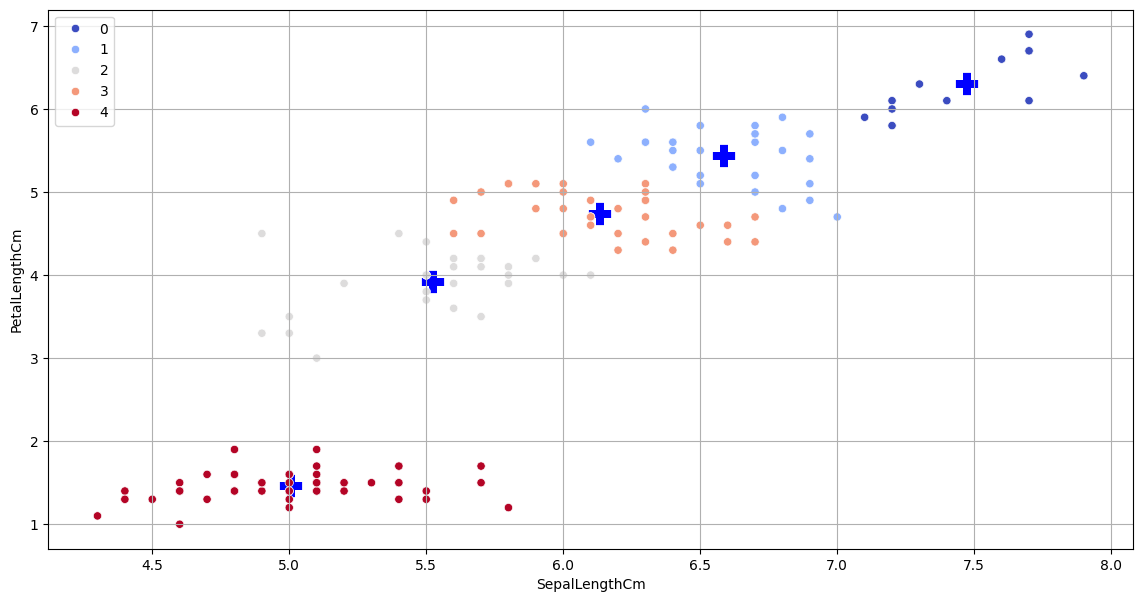

In [84]:
centroids = model.cluster_centers_
index = model.labels_

plt.figure(figsize=(14, 7))
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='b', linewidth=16)
sns.scatterplot(data=data, x="SepalLengthCm", y="PetalLengthCm", hue=index, palette="coolwarm")
plt.grid()
plt.savefig("K-Means_iris")

(0, 0.5, 'Distortion')

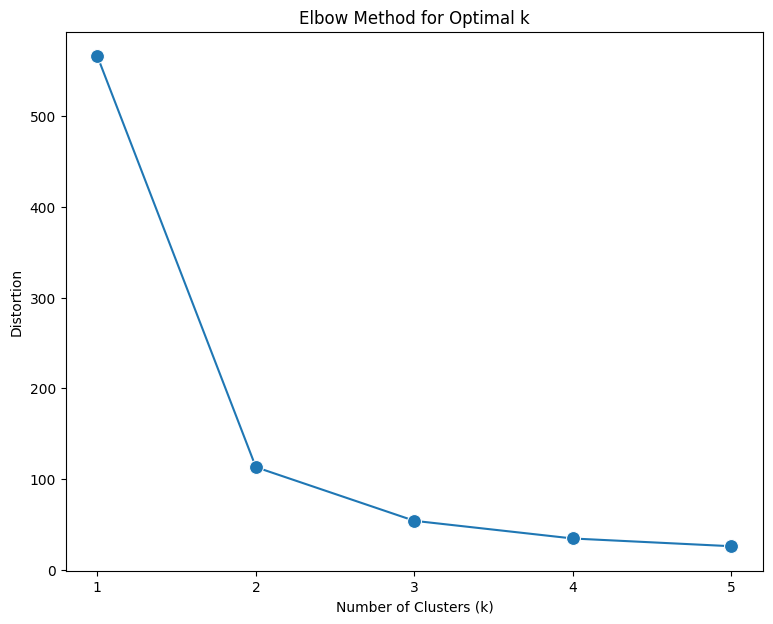

In [85]:
plt.figure(figsize=(9,7))
sns.lineplot(x=np.arange(1,k+1),y=np.array(distortion),marker="o",markersize=10)
plt.xticks(np.arange(1,k+1))
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
(0, 0.5, 'Distortion')
